In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns
sns.set_context('poster', font_scale=1.25)

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from LB_D2Q9.dimensionless import opencl_dim as lb_cl

In [5]:
sns.set_style('ticks')

# Checking that refining resolution gives us the same result

We create simulations at different resolutions with the same Reynold's number.

In [18]:
D = 1.5 # meter
rho = 10. # kg/m^3
nu = 5. # Viscosity, m^2/s

pressure_grad = -5 # Pa/m

pipe_length = 2*D # meter

sim0 = lb_cl.Pipe_Flow(diameter=D, rho=rho, viscosity=nu, pressure_grad=pressure_grad, pipe_length=pipe_length,
                       N=15, time_prefactor=1.,
                       two_d_local_size = (32, 32), three_d_local_size = (32, 32, 1))

Characteristic L: 1.5
Characteristic T: 1.73205080757
Weinstein number: 0.259807621135
u_lb: 0.0666666666667
omega 0.0830081807173
2d global: (32, 32)
2d local: (32, 32)
3d global: (32, 32, 9)
3d local: (32, 32, 1)
The platforms detected are:
---------------------------
Intel(R) OpenCL Intel(R) Corporation version: OpenCL 1.2 LINUX
The devices detected on platform Intel(R) OpenCL are:
---------------------------
       Intel(R) Core(TM) i7-3537U CPU @ 2.00GHz [Type: CPU ]
Maximum clock Frequency: 2000 MHz
Maximum allocable memory size: 2062 MB
Maximum work group size 8192
Maximum work item dimensions 3
Maximum work item size [8192, 8192, 8192]
---------------------------
This context is associated with  1 devices
inlet rho: 1.02755555556
outlet rho: 1.0


In [17]:
D = 1.5 # meter
rho = 10. # kg/m^3
nu = 5. # Viscosity, m^2/s

pressure_grad = -10 # Pa/m

pipe_length = 2*D # meter


sim1 = lb_cl.Pipe_Flow(diameter=D, rho=rho, viscosity=nu, pressure_grad=pressure_grad, pipe_length=pipe_length,
                       N=50, time_prefactor=1.,
                       two_d_local_size = (32, 32), three_d_local_size = (32, 32, 1))

Characteristic L: 1.5
Characteristic T: 1.22474487139
Weinstein number: 0.367423461417
u_lb: 0.02
omega 0.115407264381
2d global: (128, 64)
2d local: (32, 32)
3d global: (128, 64, 9)
3d local: (32, 32, 1)
The platforms detected are:
---------------------------
Intel(R) OpenCL Intel(R) Corporation version: OpenCL 1.2 LINUX
The devices detected on platform Intel(R) OpenCL are:
---------------------------
       Intel(R) Core(TM) i7-3537U CPU @ 2.00GHz [Type: CPU ]
Maximum clock Frequency: 2000 MHz
Maximum allocable memory size: 2062 MB
Maximum work group size 8192
Maximum work item dimensions 3
Maximum work item size [8192, 8192, 8192]
---------------------------
This context is associated with  1 devices
inlet rho: 1.002424
outlet rho: 1.0


In [17]:
D = 1. # meter
rho = 1. # kg/m^3
nu = 1. # Viscosity, m^2/s

pressure_grad = -10 # Pa/m

pipe_length = 3*D # meter

sim2 = lb_cl.Pipe_Flow(diameter=D, rho=rho, viscosity=nu, pressure_grad=pressure_grad, pipe_length=pipe_length,
                       N=100, time_prefactor=1,
                       two_d_local_size = (32, 32), three_d_local_size = (32, 32, 1))

Characteristic L: 1.0
Characteristic T: 0.8
Reynolds number: 1.5625
u_lb: 0.01
omega 0.413223140496
2d global: (320, 128)
2d local: (32, 32)
3d global: (320, 128, 9)
3d local: (32, 32, 1)
The platforms detected are:
---------------------------
NVIDIA CUDA NVIDIA Corporation version: OpenCL 1.2 CUDA 7.5.23
The devices detected on platform NVIDIA CUDA are:
---------------------------
GeForce GTX TITAN Black [Type: GPU ]
Maximum clock Frequency: 980 MHz
Maximum allocable memory size: 1610 MB
Maximum work group size 1024
Maximum work item dimensions 3
Maximum work item size [1024, 1024, 64]
---------------------------
This context is associated with  1 devices
inlet rho: 1.0057792
outlet rho: 1.0


We run each simulation for the same amount of time when approaching the steady state. This is a little tricky as each simulation has a different time step.

In [19]:
time_to_run = 10 # dimensionless time
num_steps = int(time_to_run/sim0.delta_t)
print 'Running for', num_steps

Running for 2250


In [20]:
sim0.run(num_steps)

In [19]:
num_steps = int(time_to_run/sim1.delta_t)
print 'Running for', num_steps

Running for 7500


In [20]:
sim1.run(num_steps)

In [22]:
num_steps = int(time_to_run/sim2.delta_t)
print 'Running for', num_steps

Running for 10000


In [23]:
sim2.run(num_steps)

We now plot each simulation's solution to make sure that they look the same.

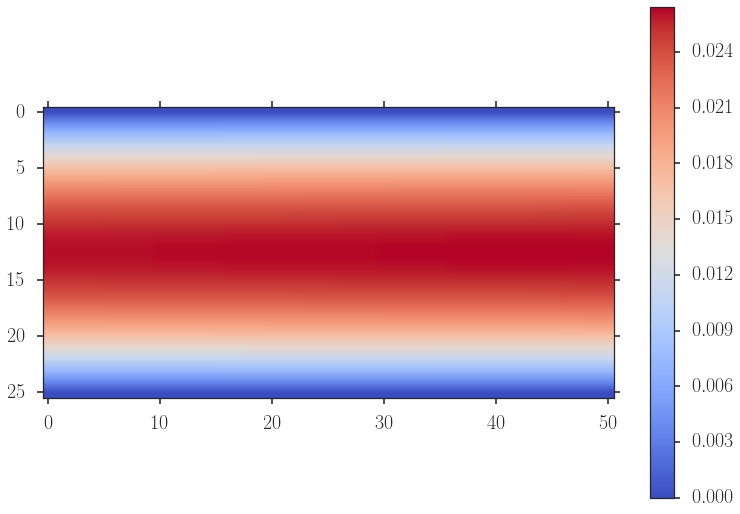

In [9]:
fields = sim0.get_fields()
plt.imshow(fields['u'].T, cmap=cm.coolwarm)
plt.grid(False)

plt.colorbar()

RUH ROH lol

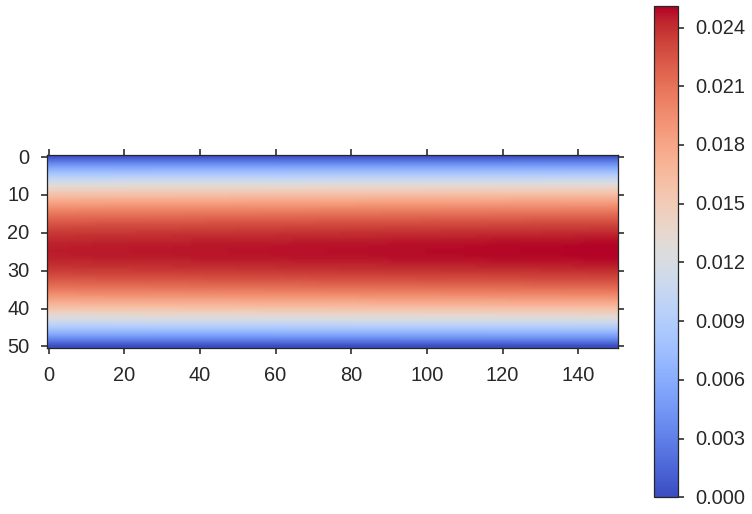

In [25]:
fields = sim1.get_fields()
plt.imshow(fields['u'].T, cmap=cm.coolwarm)
plt.grid(False)

plt.colorbar()

RUH ROH LOLOLOLOLOLOL

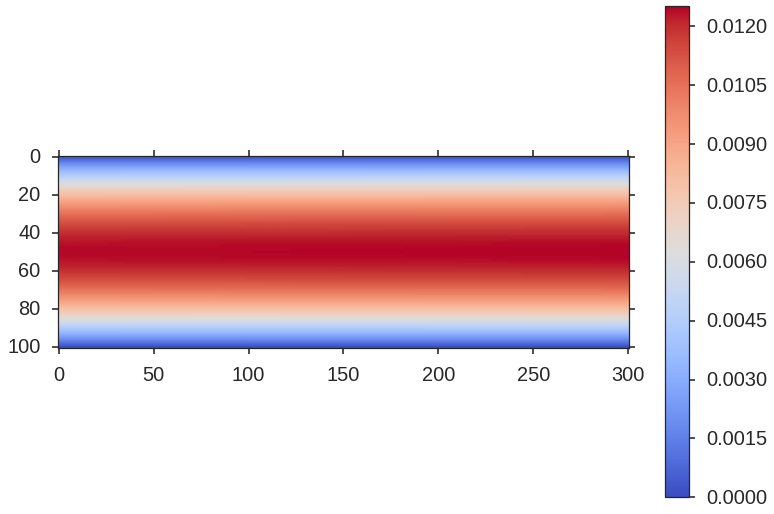

In [26]:
fields = sim2.get_fields()
plt.imshow(fields['u'].T, cmap=cm.coolwarm)
plt.grid(False)

plt.colorbar()

This still looks super wacky. Not sure why...

We make a plot of our pipe flow solution. sim2 is the highest resolution and consequently looks the best!

In [27]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

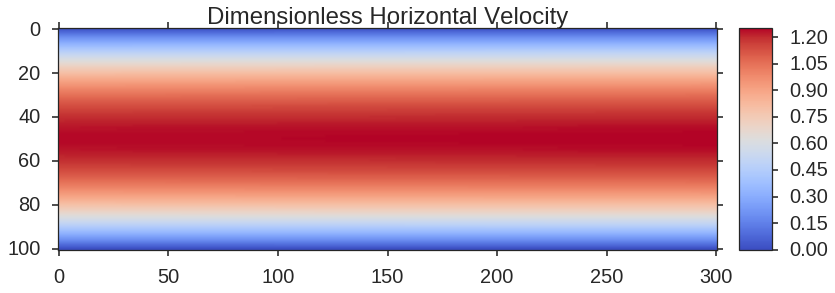

In [28]:
fields = sim2.get_nondim_fields()
im = plt.imshow(fields['u'].T, cmap=cm.coolwarm)
plt.grid(False)
plt.title('Dimensionless Horizontal Velocity')

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes('right', size='5%', pad=0.3)
plt.colorbar(im, cax=cax)

#plt.savefig('standard_pipe_flow.png', dpi=200, bbox_inches='tight')

In [29]:
sns.set_style('ticks')

In [30]:
import matplotlib

In [31]:
matplotlib.rc('text', usetex=True)

We now compare our simulations with theory.

Yeah. Our Bc on the wall doesn't look right...negative velocity on the wall? lol

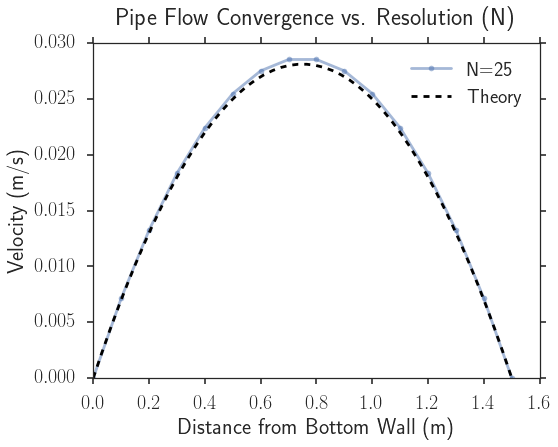

In [21]:
fields0 = sim0.get_physical_fields()
#fields1 = sim1.get_physical_fields()
# fields2 = sim2.get_physical_fields()

x_values = np.arange(fields0['u'].T.shape[0])*sim0.delta_x*sim0.L
# Get the mean velocity in the x direction
mean_u = fields0['u'].T.mean(axis=1)
plt.plot(x_values, mean_u, label='N=25', ls='-', marker='.', alpha=0.5)


# x_values = np.arange(fields1['u'].T.shape[0])*sim1.delta_x*sim1.L
# # Get the mean velocity in the x direction
# mean_u = fields1['u'].T.mean(axis=1)
# plt.plot(x_values, mean_u, label='N=50', ls='-', marker='.', alpha=0.5)

# x_values = np.arange(fields2['u'].T.shape[0])*sim2.delta_x*sim2.L
# mean_u = fields2['u'].T.mean(axis=1)
# plt.plot(x_values, mean_u, label='N=150', ls='-', marker='.', alpha=0.5)

prefactor = (1./(2*rho*nu))*pressure_grad
y = np.linspace(0, D)

predicted = prefactor*y*(y-D)
# Convert non-dim predicted

plt.plot(y, predicted, label='Theory', color='Black', ls='--')

plt.xlabel('Distance from Bottom Wall (m)')
plt.ylabel('Velocity (m/s)')

plt.title('Pipe Flow Convergence vs. Resolution (N)', y=1.04)

plt.legend(loc='best')

plt.gcf().set_size_inches(8, 6)

plt.savefig('resolution_convergence_nonscaled.png', dpi=200, bbox_inches='tight')

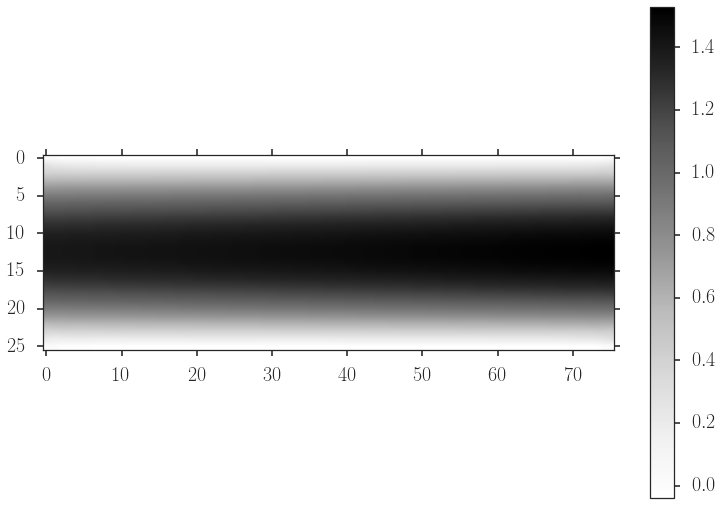

In [36]:
plt.imshow(fields0['u'].T)
plt.colorbar()

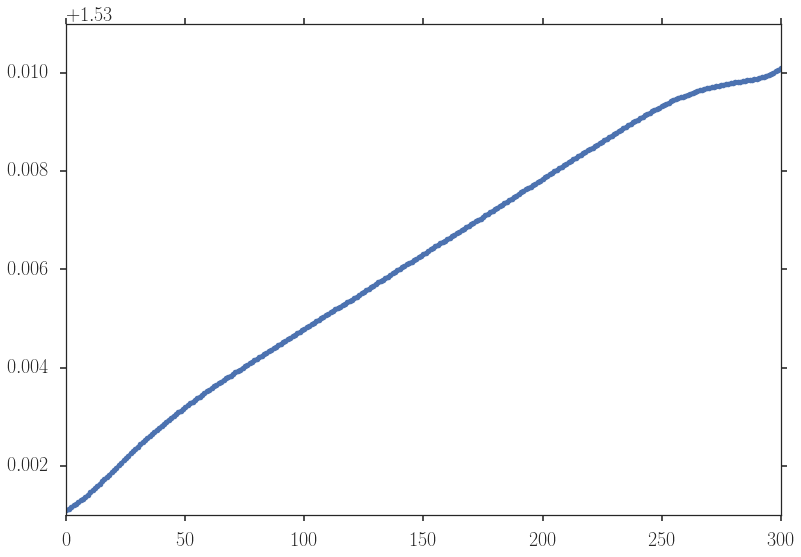

In [47]:
plt.plot(fields2['u'].T[50, :], ls='-', marker='.')

Well, they are *extremely* close now. That's good at least. I'm not exactly sure why the simulations don't line up exactly with the theory. It could be the less accurate boundary conditions we used.

Let's calculate the reynold's #'s of our simulation empirically.

In [30]:
f1 = sim1.get_fields()

In [31]:
u_lb = np.max(np.abs(f1['u']))
N_lb = sim1.N
nu_lb = sim1.lb_viscosity

print (u_lb*N_lb)/nu_lb

1.82637639227


In [32]:
f2 = sim2.get_fields()

In [33]:
u_lb = np.max(f2['u'])
N_lb = sim2.N
nu_lb = sim2.lb_viscosity

print (u_lb*N_lb)/nu_lb

1.85197059182


Ok. The reynold's #'s are the same for the two, but are not what we expect analytically, so there is something slightly wrong. Luckily, they are not too far off! This is probably fine for now, but I would like to fix this in the future.